# Table of Contents
1. [download/read csv file](#sec1)
2. [Convert the labeled data set tags into the new individual tag columns](#sec2)
3. [NLTK](#sec3)
4. [Classifier Building](#sec4)

In [4]:
#packages
#%pip install numpy
#%pip install pandas
import numpy as np
import pandas as pd

<a id = "sec1"></a>
## **Download/Read CSV file**

In [5]:
# read csv
github_csv_url = "https://raw.githubusercontent.com/JL72005/PIT-UN-Project4/refs/heads/main/NEW_TAGS_dc_md_va_flash_floods_1996_present.xlsx%20-%20dc_md_va_flash_floods_1996_pres.csv?token=GHSAT0AAAAAADCLZGCQTGZ6S7D4POOSP64O2CBUHIA"
df = pd.read_csv(github_csv_url)
# print first 5 rows
print(df.head())

   BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  END_TIME  \
0           199601         19        1100         199601       19      1300   
1           199606         18          30         199606       18       200   
2           199606         20        2200         199606       20      2300   
3           199609          6        1200         199609        6      1800   
4           199611          8        1600         199611        8      1715   

   EPISODE_ID  EVENT_ID                 STATE  STATE_FIPS  ...  END_LOCATION  \
0     2403644   5541358  DISTRICT OF COLUMBIA          11  ...           ALL   
1     1014286   5561204  DISTRICT OF COLUMBIA          11  ...     N PORTION   
2     2040906   5561207  DISTRICT OF COLUMBIA          11  ...     NORTHWEST   
3     2049837   5572405  DISTRICT OF COLUMBIA          11  ...      DOWNTOWN   
4     2049872   5572790  DISTRICT OF COLUMBIA          11  ...      CITYWIDE   

  BEGIN_LAT BEGIN_LON END_LAT  END_LON  \
0 

<a id = "sec2"></a>
## **Convert the labeled data set tags into the new individual tag columns**

In [6]:
#list of tags
tag_names = ['death','injury','evacuation','rescue','car_crash','home_damage','infrastructure_damage','soft_infrastructure_damage','road_closure','power_outage','tree_damage','vehicle_loss','agricultural_damage','campground_damage']
#list of weather events
weather_names = ['nor_easter','thunderstorm','hurricane','tornado','lightning','mudslide']

In [42]:
# Populate columns for OG tags
for tag in tag_names:
    df[tag] = 0  # Initialize column as int
    df.loc[0:906, tag] = df.loc[0:906, 'IMPACT_PREDICTORS'].apply(str).apply(lambda x: 1 if tag in x else 0)

# Populate columns for weather-related tags
for tag in weather_names:
    df[tag] = df['weather_events'].apply(str).apply(lambda x: 1 if tag in x else 0).astype(int)


In [ ]:
#check columns
df[[tag_names+weather_names]].head(15)

,death,injury,evacuation,rescue,car_crash,home_damage,infrastructure_damage,soft_infrastructure_damage,road_closure,power_outage,tree_damage,vehicle_loss,agricultural_damage,campground_damage,nor_easter,thunderstorm,hurricane,tornado,lightning,mudslide
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0


<a id="sec3"></a>
## **NLTK**

In [9]:
#imports
#%pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

### Tokenization and Stop Word Removal

In [10]:
# TOKENIZATION & REMOVING STOP WRODS

#download necessary NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
#download stopwords
stop_words = set(stopwords.words('english'))

def remove_stopword(text):
  tk = RegexpTokenizer(r'\w+')
  word_tokens = tk.tokenize(text)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  filtered_text = " ".join(filtered_sentence)
  return filtered_text

df['TOKEN_EPISODE_NARRATIVE'] = df['EPISODE_NARRATIVE'].apply(str).apply(remove_stopword)
df['TOKEN_EVENT_NARRATIVE'] = df['EVENT_NARRATIVE'].apply(str).apply(remove_stopword)
df[['TOKEN_EPISODE_NARRATIVE', 'TOKEN_EVENT_NARRATIVE']].head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,TOKEN_EPISODE_NARRATIVE,TOKEN_EVENT_NARRATIVE
0,unusually intense squall line feeding unseason...,nan
1,Intense thunderstorms moved northeast half Was...,nan
2,rapidly developing thunderstorm knocked numero...,nan
3,Feeder bands torrential tropical rains associa...,nan
4,Several roads briefly closed torrential rains ...,nan


### Stemming

In [11]:
# STEMMING

stemmer = PorterStemmer()

def stem_narrative(text):
    token_list = text.split(" ")
    stemmed_list = []
    for word in token_list:
        stemmed_list.append(stemmer.stem(word))
    return stemmed_list

df['STEM_EPISODE_NARRATIVE'] = df['TOKEN_EPISODE_NARRATIVE'].apply(str).apply(stem_narrative).apply(lambda x: " ".join(x)) #where x is the list of stemmed words
df['STEM_EVENT_NARRATIVE'] = df['TOKEN_EVENT_NARRATIVE'].apply(str).apply(stem_narrative).apply(lambda x: " ".join(x)) #where x is the list of stemmed words
df['STEM_EPISODE_NARRATIVE'].head()


0    unusu intens squall line feed unseason warm mo...
1    intens thunderstorm move northeast half washin...
2    rapidli develop thunderstorm knock numer tree ...
3    feeder band torrenti tropic rain associ remnan...
4    sever road briefli close torrenti rain associ ...
Name: STEM_EPISODE_NARRATIVE, dtype: object

### Lemmatization: Reducing word to base form

In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

from nltk.corpus import wordnet
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')


# Helper: Convert NLTK POS tag to WordNet POS
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN) 

def lemmatize_narrative(text):
    token_list = text.split(" ")
    lemmatized_list = []
    for word in token_list:
        pos = get_wordnet_pos(word)
        lemmatized_list.append(lemmatizer.lemmatize(word,pos))
    lemmatized_sentence = " ".join(lemmatized_list)
    return lemmatized_sentence
df['LEM_EPISODE_NARRATIVE'] = df['TOKEN_EPISODE_NARRATIVE'].apply(str).apply(lemmatize_narrative)
df['LEM_EVENT_NARRATIVE'] = df['TOKEN_EVENT_NARRATIVE'].apply(str).apply(lemmatize_narrative)
df[['LEM_EPISODE_NARRATIVE', 'LEM_EVENT_NARRATIVE']].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,LEM_EPISODE_NARRATIVE,LEM_EVENT_NARRATIVE
0,unusually intense squall line feed unseasonabl...,nan
1,Intense thunderstorm move northeast half Washi...,nan
2,rapidly develop thunderstorm knock numerous tr...,nan
3,Feeder band torrential tropical rain associate...,nan
4,Several road briefly close torrential rain ass...,nan


<a id ="sec4"></a>
## **Classifier Building**

### Corpus Creation

In [13]:
#take spreadsheet of tags and their key words and generate a list/corpus for every tag
import csv
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')


# Helper: Convert NLTK POS tag to WordNet POS
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)  # default to noun

lemmatizer2 = WordNetLemmatizer()
with open('tag_corpus.csv','r') as inputFile:
    data = csv.DictReader(inputFile)
    tag_corpus = {row['Tag']: row['Similar Words'].split(', ') for row in data}
    for tag in tag_corpus:
        for i in range(len(tag_corpus[tag])):
            word = tag_corpus[tag][i].strip()
            pos = get_wordnet_pos(word)
            tag_corpus[tag][i] = lemmatizer.lemmatize(word, pos)
            #print(tag_corpus[tag][i])
        tag_corpus[tag] = list(set(tag_corpus[tag])) #removes duplicates
        print(tag_corpus[tag])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


['dead', 'casualty', 'die', 'drowns', 'swept away', 'fatal', 'perish', 'casualities', 'death', 'fatality', 'drown', 'lifeless']
['injured', 'treated and released from Army community hospital', 'wound', 'injury', 'hurt', 'harm']
['relocate', 'evacuate', 'strand', 'evacuation', 'climbed to safety', 'forced out', 'isolated', 'moved out', 'displace']
['save', 'rescue', 'retrieve', 'retrieval']
['accident', 'crashed', 'collision', 'crash', 'vehicle accident', 'car crash', 'wreck']
['shingle', 'residence', 'residence damage', 'mobile homes', 'fence', 'porch', 'mailbox', 'house', 'shed', 'mobile home parks', 'side', 'roof collapse', 'apartment buildings', 'home', 'roof', 'house damage', 'property damage', 'flooded house', 'dwelling', 'home damage', 'residential gardens', 'gutter', 'home destroyed', 'windows,chimneys', 'basement flooded', 'garage', 'flooded home']
['metro subway system', 'mezzanine and platform levels', 'station', 'pumping stations', 'infrastructure', 'escalator']
['Fire Stati

### Create Function that adds these tags

In [ ]:
def label_tag(text, tag): 
    for syns in tag_corpus[tag]: #the list in the tag 
        if syns in text: #if the text is in the list
            return int(1)
    return int(0)


### Apply The Function to our sets

#### Real Values

In [66]:
# apply the label_tag function to each row in the dataframe for each tag
df2 = df.copy()  # Create a copy of the original dataframe to avoid modifying it directly
for tag in tag_corpus:
    df2.loc[0:908, tag] = df2.loc[0:908, "STEM_EPISODE_NARRATIVE"].apply(lambda text: label_tag(text, tag)).astype(int)
    df2.loc[0:908, tag] = df2.loc[0:908, "STEM_EVENT_NARRATIVE"].apply(lambda text: label_tag(text, tag)).astype(int)
    #print(f"finished labeling tag: {tag}")
    
# check the first 15 rows of the dataframe for selected columns
#df2[['EPISODE_NARRATIVE', 'STEM_EPISODE_NARRATIVE', 'death', 'injury', 'evacuation', 'rescue', 'infrastructure_damage', 'road_closure']].head(14)
df2[['EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'STEM_EPISODE_NARRATIVE', 'STEM_EVENT_NARRATIVE', 'thunderstorm']].head(15)

,EPISODE_NARRATIVE,EVENT_NARRATIVE,STEM_EPISODE_NARRATIVE,STEM_EVENT_NARRATIVE,thunderstorm
0,"An unusually intense squall line, feeding on a...",NaN,unusu intens squall line feed unseason warm mo...,nan,0
1,Intense thunderstorms moved through the northe...,NaN,intens thunderstorm move northeast half washin...,nan,0
2,A rapidly developing thunderstorm knocked down...,NaN,rapidli develop thunderstorm knock numer tree ...,nan,0
3,Feeder bands of torrential tropical rains asso...,NaN,feeder band torrenti tropic rain associ remnan...,nan,0
4,Several roads were briefly closed after torren...,NaN,sever road briefli close torrenti rain associ ...,nan,0
5,"Tropical moisture, feeding along a south movin...",NaN,tropic moistur feed along south move cold fron...,nan,0
6,A slow-moving line of thunderstorms dumped bet...,NaN,slow move line thunderstorm dump 2 4 3 inch ra...,nan,0
7,"A thunderstorm, dumping rainfall of 3/4 to 1 i...",NaN,thunderstorm dump rainfal 3 4 1 inch citi shor...,nan,0
8,"A powerful nor'easter, laden with abundant tro...",NaN,power easter laden abund tropic moistur gulf m...,nan,0
9,A line of thunderstorms produced very heavy ra...,Major streets closed by high water,line thunderstorm produc heavi rain move acros...,major street close high water,0


#### Compute the accuracy - Jessica 

In [67]:
#write the accuracy 
#compare the original dataframe with the new dataframe
for tag in tag_corpus:
    original_count = df[tag].sum()
    new_count = df2[tag].sum()
    accuracy = (new_count / original_count) * 100 if original_count > 0 else 0
    print(f"Tag: {tag}, Original Count: {original_count}, New Count: {new_count}, Accuracy: {accuracy:.2f}%")

Tag: death, Original Count: 247, New Count: 201, Accuracy: 81.38%
Tag: injury, Original Count: 13, New Count: 11, Accuracy: 84.62%
Tag: evacuation, Original Count: 168, New Count: 111, Accuracy: 66.07%
Tag: rescue, Original Count: 13, New Count: 12, Accuracy: 92.31%
Tag: car_crash, Original Count: 20, New Count: 9, Accuracy: 45.00%
Tag: home_damage, Original Count: 737, New Count: 531, Accuracy: 72.05%
Tag: infrastructure_damage, Original Count: 524, New Count: 446, Accuracy: 85.11%
Tag: soft_infrastructure_damage, Original Count: 277, New Count: 143, Accuracy: 51.62%
Tag: road_closure, Original Count: 1121, New Count: 793, Accuracy: 70.74%
Tag: power_outage, Original Count: 739, New Count: 565, Accuracy: 76.45%
Tag: tree_damage, Original Count: 842, New Count: 598, Accuracy: 71.02%
Tag: vehicle_loss, Original Count: 1453, New Count: 1157, Accuracy: 79.63%
Tag: agricultural_damage, Original Count: 72, New Count: 28, Accuracy: 38.89%
Tag: animal_loss, Original Count: 117, New Count: 52,

### visualize the impacts -Jessica and Emma 
heatmap, frequency/barchart, co-occurence

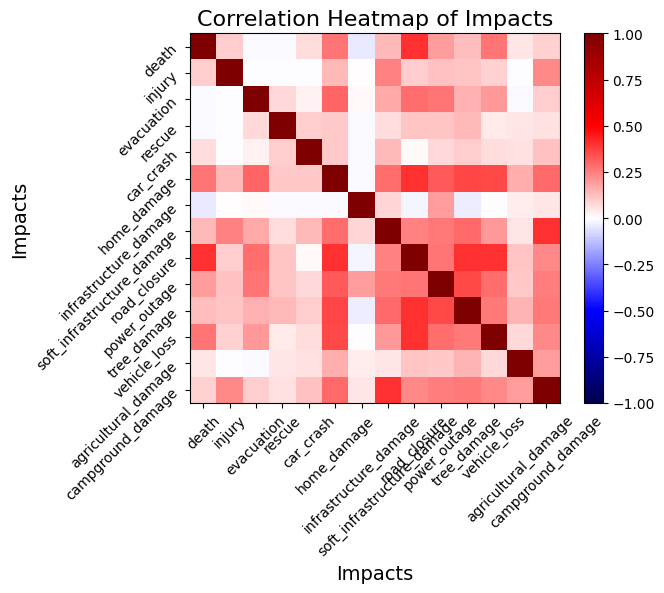

<Figure size 1000x800 with 0 Axes>

In [88]:
#heat map of the tags
all_tags = tag_names + weather_names

import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for tag columns
corr_matrix = df2[tag_names].corr()

#heatmap of tags with tags
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix, cmap='seismic', vmin=-1, vmax=1)  # Changed 'rocket' to 'RdBu'
# Add color bar
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(range(len(tag_names)), labels=tag_names, rotation=45,fontsize=10)  # Rotate x-axis labels for better visibility
ax.set_yticks(range(len(tag_names)), labels=tag_names, rotation=45,fontsize=10)  # Set y-axis labels
plt.figure(figsize=(10, 8))  # Adjust figure size for better visibility
# Set title and labels
ax.set_title('Correlation Heatmap of Impacts', fontsize=16)
ax.set_xlabel('Impacts', fontsize=14)
ax.set_ylabel('Impacts', fontsize=14)
# Overlay seaborn heatmap for annotation and better visuals
#sns.heatmap(corr_matrix, cmap='Spectral', annot=True, vmin=-1, vmax=1, linewidths=0.5, linecolor='white', ax=ax)
plt.show()


### create FIS score - Danielle 
We should check for multicollinearity 